# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing necessary models for implementation of ANN
from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import Dense #, Activation,Layer,Lambda # dense means how many neurons

Using TensorFlow backend.
C:\Users\deshp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\deshp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\deshp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\deshp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
a=100
from sklearn.model_selection import train_test_split


In [4]:
forestfires = pd.read_csv("C:\\Excelr Data\\Assignments\\Neural Networks\\forestfires.csv")
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
forestfires.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small


In [6]:
forestfires.drop(["month","day"],axis=1,inplace=True)

In [7]:
forestfires.describe()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
forestfires.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [9]:
forestfires.shape

(517, 29)

In [10]:
forestfires.isnull().sum() # No missing values 

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [11]:
#  small as 0 and large as 1

forestfires.loc[forestfires.size_category=="small","size_category"] = 0
forestfires.loc[forestfires.size_category=="large","size_category"] = 1

In [12]:
forestfires.head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


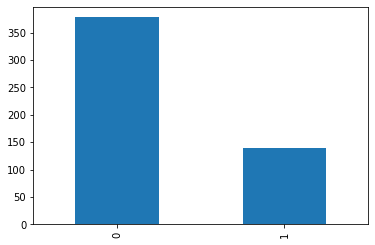

In [13]:
forestfires.size_category.value_counts().plot(kind="bar")


In [14]:
train,test = train_test_split(forestfires,test_size = 0.3,random_state=50)


In [15]:
train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
246,91.8,175.1,700.7,13.8,25.7,39,5.4,0.0,0.09,0,...,0,0,0,0,0,0,0,0,0,0
9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
18,89.2,27.9,70.8,6.3,15.9,35,4.0,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
201,90.1,37.6,83.7,7.2,12.4,54,3.6,0.0,12.10,0,...,0,0,0,0,1,0,0,0,0,1
219,90.1,39.7,86.6,6.2,15.2,27,3.1,0.0,31.86,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,91.2,48.3,97.8,12.5,15.8,27,7.6,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
132,89.3,51.3,102.2,9.6,10.6,46,4.9,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
289,91.6,104.2,474.9,9.0,24.3,30,1.8,0.0,0.00,0,...,0,0,1,0,0,0,0,0,0,0
109,88.6,91.8,709.9,7.1,17.4,56,5.4,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
463,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0,...,1,0,0,0,0,0,0,0,0,0
418,92.0,203.2,664.5,8.1,24.9,42,5.4,0.0,2.44,0,...,0,0,0,0,0,0,0,0,0,0
391,91.1,91.3,738.1,7.2,20.7,46,2.7,0.0,30.18,1,...,0,0,0,0,0,0,0,0,1,1
370,91.0,276.3,825.1,7.1,13.8,77,7.6,0.0,11.06,0,...,0,0,0,0,0,0,0,0,1,1
166,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0,2.29,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,95.8,152.0,624.1,13.8,32.4,21,4.5,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
475,93.7,121.7,350.2,18.0,22.7,40,9.4,0.0,3.19,0,...,0,0,0,1,0,0,0,0,0,0
433,93.6,235.1,723.1,10.1,20.9,66,4.9,0.0,15.34,0,...,0,0,0,0,0,0,0,0,0,1
374,90.3,290.0,855.3,7.4,10.3,78,4.0,0.0,18.30,1,...,0,0,0,0,0,0,0,0,1,1


In [17]:
trainX = train.drop(["size_category"],axis=1)# all independant variables
trainY = train["size_category"]   #only target variable
testX = test.drop(["size_category"],axis=1)
testY = test["size_category"]

In [18]:
test.size_category.value_counts()

0    111
1     45
Name: size_category, dtype: int64

## Preparing a function to define the structure ANN network 
# Number hidden neurons & Hidden Layers 
# Activation function 
# Optimizer - similar to that of gradient decent 
# loss - loss function 
# rmsprop - > Root mean sqaure prop 

In [19]:
def prep_model(hidden_dim):
    model = Sequential() # initialize 
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    # To define the dimensions for the output layer
    # activation - sigmoid 
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    # loss function -> loss parameter
    # algorithm to update the weights - optimizer parameter
    # accuracy - metric to display for 1 epoch
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model  

In [20]:
# giving input as list format which is referring to
# number of input features - 30
# number of hidden neurons in each hidden layer - 4  layers
# 50- hidden neurons - 1st hidden layer
# Number of dimensions for output layer  - last 


In [21]:
first_model = prep_model([28,50,40,20,1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
# Fitting ANN model with epochs = 700 
first_model.fit(np.array(trainX),np.array(trainY),epochs=30)



Epoch 1/30
361/361 [==============================] - 0s 1ms/step - loss: 2.2137 - accuracy: 0.6177
Epoch 2/30
361/361 [==============================] - 0s 105us/step - loss: 0.4834 - accuracy: 0.7673
Epoch 3/30
361/361 [==============================] - 0s 100us/step - loss: 0.4911 - accuracy: 0.7922
Epoch 4/30
361/361 [==============================] - 0s 97us/step - loss: 0.4839 - accuracy: 0.7673
Epoch 5/30
361/361 [==============================] - 0s 100us/step - loss: 0.4804 - accuracy: 0.8116
Epoch 6/30
361/361 [==============================] - 0s 101us/step - loss: 0.4631 - accuracy: 0.8255
Epoch 7/30
361/361 [==============================] - 0s 76us/step - loss: 0.4426 - accuracy: 0.7867
Epoch 8/30
361/361 [==============================] - 0s 39us/step - loss: 0.4019 - accuracy: 0.8116
Epoch 9/30
361/361 [==============================] - 0s 33us/step - loss: 0.3571 - accuracy: 0.8532
Epoch 10/30
361/361 [==============================] - 0s 33us/step - loss: 0.4316 - ac

In [23]:
# predicting the probability values for each record
pred_train = first_model.predict(np.array(trainX))


In [24]:
# pd.Series - > convert list format Pandas Series data structure
pred_train = pd.Series([i[0] for i in pred_train])

In [25]:
size_category = ["small","large"]

In [26]:
# converting series because add them as columns into data frame
pred_train_class = pd.Series(["small"]*361)#all 361 replace with large
pred_train_class

0      small
1      small
2      small
3      small
4      small
       ...  
356    small
357    small
358    small
359    small
360    small
Length: 361, dtype: object

In [27]:
pred_train_class[[i>0.5 for i in pred_train]] = "large"


In [28]:
from sklearn.metrics import confusion_matrix
train["original_class"] = "small"
train.loc[train.size_category==1,"original_class"] = "large"


C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\deshp\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [29]:
train.original_class.value_counts()

small    267
large     94
Name: original_class, dtype: int64

In [30]:
# Two way table format 
confusion_matrix(pred_train_class,train.original_class)


array([[ 64,   0],
       [ 30, 267]], dtype=int64)

In [31]:
# Calculating the accuracy using mean function from numpy 
# we need to reset the index values of train data as the index values are random numbers
np.mean(pred_train_class==pd.Series(train.original_class).reset_index(drop=True))


0.9168975069252078

In [32]:
# 2 way table 
pd.crosstab(pred_train_class,pd.Series(train.original_class).reset_index(drop=True))


original_class,large,small
row_0,,
large,64,0
small,30,267


In [33]:
# Predicting for test data 
pred_test = first_model.predict(np.array(testX))
pred_test

array([[0.01180413],
       [0.09212989],
       [0.9917728 ],
       [0.2680974 ],
       [0.03484866],
       [0.01997116],
       [0.549691  ],
       [0.02025765],
       [0.03806156],
       [0.19787052],
       [0.5395369 ],
       [0.99843013],
       [0.639567  ],
       [0.03405049],
       [0.00681475],
       [0.0264692 ],
       [0.00448492],
       [0.11608458],
       [0.02117434],
       [0.02787271],
       [0.03310072],
       [1.        ],
       [0.01833132],
       [0.00641447],
       [0.036089  ],
       [0.0262115 ],
       [0.4222306 ],
       [0.78675807],
       [0.07727593],
       [0.7494205 ],
       [0.0558449 ],
       [0.07422638],
       [0.02665544],
       [0.03403643],
       [0.03506362],
       [0.99998903],
       [0.0440816 ],
       [0.9999653 ],
       [0.16117403],
       [0.02266863],
       [0.01241866],
       [0.02951282],
       [0.06525081],
       [0.10447764],
       [0.00388861],
       [0.25155586],
       [0.03079888],
       [0.015

In [34]:
pred_test = pd.Series([i[0] for i in pred_test])
pred_test

0      0.011804
1      0.092130
2      0.991773
3      0.268097
4      0.034849
         ...   
151    0.066146
152    0.110984
153    0.754789
154    0.718465
155    0.025306
Length: 156, dtype: float64

In [35]:
pred_test_class = pd.Series(["small"]*156)
pred_test_class

0      small
1      small
2      small
3      small
4      small
       ...  
151    small
152    small
153    small
154    small
155    small
Length: 156, dtype: object

In [36]:
pred_test_class[[i>0.5 for i in pred_test]] = "large"
test["original_class"] = "small"
test.loc[test.size_category==1,"original_class"] = "large"


C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\deshp\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [37]:
test.original_class.value_counts()


small    111
large     45
Name: original_class, dtype: int64

In [38]:
temp = pd.Series(test.original_class).reset_index(drop=True)
temp 

0      small
1      small
2      large
3      large
4      small
       ...  
151    small
152    small
153    large
154    large
155    small
Name: original_class, Length: 156, dtype: object

In [39]:
np.mean(pred_test_class==pd.Series(test.original_class).reset_index(drop=True)) # 97.66


0.9423076923076923

In [40]:
len(pred_test_class==pd.Series(test.original_class).reset_index(drop=True))
confusion_matrix(pred_test_class,temp)
#pd.crosstab(pred_test_class,test.original_class)


array([[ 36,   0],
       [  9, 111]], dtype=int64)

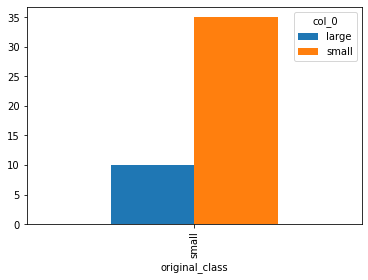

In [41]:
# to show the count of each category with respect to other category 
pd.crosstab(test.original_class,pred_test_class).plot(kind="bar")


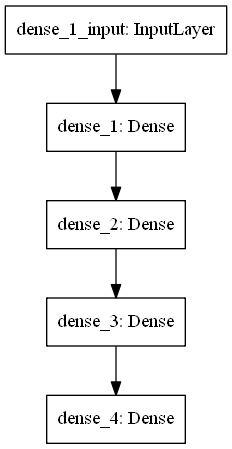

In [42]:
# small picture -  ANN network and its layers 
from keras.utils import plot_model
plot_model(first_model,to_file="first_model.png")
